# Neural Networks

This Jupyter Notebook uses a basic neural networks to classify the Iris dataset.

## Approach
* Evaluations of classification performed were performed a sample dataset:
<br>scikit-learn's Iris sample dataset, consisting of 150 sample data points for 3 varieties of iris flowers
* A neural network was defined with 2 layers and a total of 7 nodes.
* The fitting history of the model was plotting, showing how accuracy and loss using the training data varied by epoch.  In addition, horizontal lines were added to reflect the accuracy and loss when the fitted model was used with the testing data.
    
## Results
* Refer to the Figure provided below
* The neural network fitting history shows a maximum training accuracy of 0.9286 starting at epoch 994.
* The fitted model yielded an accuracy of 0.9474 with the testing data. This is lower performance than several tuned linear classifiers previous evaluated -- see [9-Hyper-Parameter Tuning](./8-Hyper-Parameter%20Tuning.ipynb)
* I would expect additional improvement in accuracy could be obtained with addition of a hidden layer in the neural network

| Figure: 9-Neural Networks - Jupyter Notebook |
|----------|
| ![Figure: 9-Neural Networks Model Fitting History is Loading...](docs/9-Figure-Neural_Networks-Model_Fitting_History.png "Figure: 9-Neural Networks Model Fitting History") |

# Dependencies

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math

from pprint import pprint

# Visualization
import graphviz
import pydotplus
from IPython.display import Image

# Machine Learning - Linear Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Linear Models - Classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier

# Machine Learning - Decision Trees and Random Forests - Classification
from sklearn import tree                             # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Machine Learning - Support Vector Machines - Classification
from sklearn import svm                              # Support Vector Machine Classifier

# Machine Learning - K-Nearest Neighbors - Classification
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors (KNN)

# Machine Learning - GridSearch for hyper-parameter tuning
from sklearn.model_selection import GridSearchCV


# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split # Split data into training and testing samples
from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Neural Networks - Models
from keras.models import Sequential               # Sequential model serving as foundation for neural network
from keras.layers import Dense                    # Nodes for specifying input, hidden, and output layers

# Machine Learning - Neural Networks - Encoding
from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# Machine Learning - Other Models-related Tools
from keras.utils import plot_model                # Plot a neural network model
from keras.models import load_model               # Load a saved machine learning model

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
from sklearn.metrics import classification_report # Calculate metrics for prediction performance
from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification
from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
from sklearn.datasets import make_classification # Generate 

Using TensorFlow backend.


# Iris Dataset

In [2]:
# Import the Iris sample dataset as a dictionary
iris = load_iris()

print( f"Iris {iris.keys()}" )
print( f"Feature Names: {iris.feature_names}" )
print( f"Target Names: {iris.target_names}" )

Iris dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [3]:
# Assign data and target variables
X = iris.data
y = iris.target
print( X.shape, y.shape )

(150, 4) (150,)


In [4]:
# Note, in this case, Label Encoding of the target/output is not needed
# because the target is already encoded as integers 0 through 2 inclusive,
# corresponding to the target names in iris.target_names
pd.DataFrame( data={ 'Target': list(set(iris.target)), 'Target Name': iris.target_names }).set_index(keys='Target')

,Target Name
Target,
0,setosa
1,versicolor
2,virginica


In [5]:
# Apply One-Hot Encoding of the label-encoded target values
y_encoded = to_categorical(y)
# y_encoded

In [6]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, stratify=y_encoded)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 3) (38, 3)


In [7]:
# # Reshape the outputs to provide a N by 1 vector (vs. array of size N) -- Not with y being encoded
# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)
# print(y_train.shape, y_test.shape)

In [8]:
# Use the training data to create a scaler to standard normal distributions for each numerical feature and output
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# Scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### Define the Neural Network model for multi-class, single-label classification

In [10]:
# Create a sequential model
model = Sequential()

W0909 16:24:22.175508  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
# Add layer:
# Number of Inputs: 4
# Number of Hidden Nodes: 4
model.add(Dense(units=4, activation='relu', input_dim=4))

# Add output layer:
# Number of Classes: 3 = # of output nodes (units) needed
model.add(Dense(units=3, activation='softmax'))

# Provide a summary of the model
model.summary()

W0909 16:24:22.217507  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 16:24:22.221509  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [12]:
# Compile the model
# Optimizer: Adam
# Loss Function: Categorical Cross-Entropy for categorical data (Mean Squared Error for regression)
# Metrics: Accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0909 16:24:22.269508  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 16:24:22.305512  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Train the Model

In [13]:
# Fit (train) the model
hist = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=1000,
    shuffle=True,
    verbose=2
)

W0909 16:24:22.456512  6820 deprecation.py:323] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0909 16:24:22.527560  6820 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1000
 - 0s - loss: 1.9739 - acc: 0.0357
Epoch 2/1000
 - 0s - loss: 1.9186 - acc: 0.0357
Epoch 3/1000
 - 0s - loss: 1.8641 - acc: 0.0357
Epoch 4/1000
 - 0s - loss: 1.8147 - acc: 0.0357
Epoch 5/1000
 - 0s - loss: 1.7627 - acc: 0.0357
Epoch 6/1000
 - 0s - loss: 1.7104 - acc: 0.0357
Epoch 7/1000
 - 0s - loss: 1.6630 - acc: 0.0446
Epoch 8/1000
 - 0s - loss: 1.6122 - acc: 0.0357
Epoch 9/1000
 - 0s - loss: 1.5627 - acc: 0.0357
Epoch 10/1000
 - 0s - loss: 1.5154 - acc: 0.0536
Epoch 11/1000
 - 0s - loss: 1.4666 - acc: 0.0536
Epoch 12/1000
 - 0s - loss: 1.4187 - acc: 0.0536
Epoch 13/1000
 - 0s - loss: 1.3712 - acc: 0.0536
Epoch 14/1000
 - 0s - loss: 1.3242 - acc: 0.0536
Epoch 15/1000
 - 0s - loss: 1.2753 - acc: 0.0625
Epoch 16/1000
 - 0s - loss: 1.2304 - acc: 0.0625
Epoch 17/1000
 - 0s - loss: 1.1837 - acc: 0.0625
Epoch 18/1000
 - 0s - loss: 1.1387 - acc: 0.0625
Epoch 19/1000
 - 0s - loss: 1.0944 - acc: 0.0625
Epoch 20/1000
 - 0s - loss: 1.0523 - acc: 0.0714
Epoch 21/1000
 - 0s - loss: 1

Epoch 157/1000
 - 0s - loss: -6.5363e+00 - acc: 0.6161
Epoch 158/1000
 - 0s - loss: -6.6308e+00 - acc: 0.6161
Epoch 159/1000
 - 0s - loss: -6.7264e+00 - acc: 0.6161
Epoch 160/1000
 - 0s - loss: -6.8230e+00 - acc: 0.6161
Epoch 161/1000
 - 0s - loss: -6.9194e+00 - acc: 0.6161
Epoch 162/1000
 - 0s - loss: -7.0164e+00 - acc: 0.6161
Epoch 163/1000
 - 0s - loss: -7.1125e+00 - acc: 0.6250
Epoch 164/1000
 - 0s - loss: -7.2112e+00 - acc: 0.6339
Epoch 165/1000
 - 0s - loss: -7.3073e+00 - acc: 0.6250
Epoch 166/1000
 - 0s - loss: -7.4068e+00 - acc: 0.6250
Epoch 167/1000
 - 0s - loss: -7.5052e+00 - acc: 0.6339
Epoch 168/1000
 - 0s - loss: -7.6029e+00 - acc: 0.6339
Epoch 169/1000
 - 0s - loss: -7.6995e+00 - acc: 0.6429
Epoch 170/1000
 - 0s - loss: -7.7997e+00 - acc: 0.6429
Epoch 171/1000
 - 0s - loss: -7.8977e+00 - acc: 0.6429
Epoch 172/1000
 - 0s - loss: -7.9910e+00 - acc: 0.6518
Epoch 173/1000
 - 0s - loss: -8.0848e+00 - acc: 0.6696
Epoch 174/1000
 - 0s - loss: -8.1789e+00 - acc: 0.6786
Epoch 175/

Epoch 306/1000
 - 0s - loss: -1.5220e+01 - acc: 0.8304
Epoch 307/1000
 - 0s - loss: -1.5239e+01 - acc: 0.8304
Epoch 308/1000
 - 0s - loss: -1.5259e+01 - acc: 0.8304
Epoch 309/1000
 - 0s - loss: -1.5277e+01 - acc: 0.8304
Epoch 310/1000
 - 0s - loss: -1.5296e+01 - acc: 0.8304
Epoch 311/1000
 - 0s - loss: -1.5315e+01 - acc: 0.8304
Epoch 312/1000
 - 0s - loss: -1.5334e+01 - acc: 0.8304
Epoch 313/1000
 - 0s - loss: -1.5352e+01 - acc: 0.8304
Epoch 314/1000
 - 0s - loss: -1.5371e+01 - acc: 0.8304
Epoch 315/1000
 - 0s - loss: -1.5392e+01 - acc: 0.8304
Epoch 316/1000
 - 0s - loss: -1.5411e+01 - acc: 0.8304
Epoch 317/1000
 - 0s - loss: -1.5429e+01 - acc: 0.8304
Epoch 318/1000
 - 0s - loss: -1.5449e+01 - acc: 0.8304
Epoch 319/1000
 - 0s - loss: -1.5467e+01 - acc: 0.8304
Epoch 320/1000
 - 0s - loss: -1.5486e+01 - acc: 0.8304
Epoch 321/1000
 - 0s - loss: -1.5504e+01 - acc: 0.8393
Epoch 322/1000
 - 0s - loss: -1.5521e+01 - acc: 0.8393
Epoch 323/1000
 - 0s - loss: -1.5540e+01 - acc: 0.8393
Epoch 324/

Epoch 455/1000
 - 0s - loss: -1.7130e+01 - acc: 0.8571
Epoch 456/1000
 - 0s - loss: -1.7137e+01 - acc: 0.8571
Epoch 457/1000
 - 0s - loss: -1.7144e+01 - acc: 0.8571
Epoch 458/1000
 - 0s - loss: -1.7150e+01 - acc: 0.8571
Epoch 459/1000
 - 0s - loss: -1.7159e+01 - acc: 0.8571
Epoch 460/1000
 - 0s - loss: -1.7166e+01 - acc: 0.8571
Epoch 461/1000
 - 0s - loss: -1.7173e+01 - acc: 0.8571
Epoch 462/1000
 - 0s - loss: -1.7182e+01 - acc: 0.8571
Epoch 463/1000
 - 0s - loss: -1.7189e+01 - acc: 0.8571
Epoch 464/1000
 - 0s - loss: -1.7196e+01 - acc: 0.8571
Epoch 465/1000
 - 0s - loss: -1.7203e+01 - acc: 0.8571
Epoch 466/1000
 - 0s - loss: -1.7210e+01 - acc: 0.8571
Epoch 467/1000
 - 0s - loss: -1.7218e+01 - acc: 0.8571
Epoch 468/1000
 - 0s - loss: -1.7225e+01 - acc: 0.8571
Epoch 469/1000
 - 0s - loss: -1.7233e+01 - acc: 0.8571
Epoch 470/1000
 - 0s - loss: -1.7239e+01 - acc: 0.8571
Epoch 471/1000
 - 0s - loss: -1.7246e+01 - acc: 0.8571
Epoch 472/1000
 - 0s - loss: -1.7255e+01 - acc: 0.8571
Epoch 473/

Epoch 604/1000
 - 0s - loss: -1.8029e+01 - acc: 0.9018
Epoch 605/1000
 - 0s - loss: -1.8035e+01 - acc: 0.9018
Epoch 606/1000
 - 0s - loss: -1.8040e+01 - acc: 0.9018
Epoch 607/1000
 - 0s - loss: -1.8045e+01 - acc: 0.9018
Epoch 608/1000
 - 0s - loss: -1.8051e+01 - acc: 0.9018
Epoch 609/1000
 - 0s - loss: -1.8056e+01 - acc: 0.9018
Epoch 610/1000
 - 0s - loss: -1.8062e+01 - acc: 0.9018
Epoch 611/1000
 - 0s - loss: -1.8067e+01 - acc: 0.9018
Epoch 612/1000
 - 0s - loss: -1.8072e+01 - acc: 0.9018
Epoch 613/1000
 - 0s - loss: -1.8078e+01 - acc: 0.9018
Epoch 614/1000
 - 0s - loss: -1.8084e+01 - acc: 0.9018
Epoch 615/1000
 - 0s - loss: -1.8089e+01 - acc: 0.9018
Epoch 616/1000
 - 0s - loss: -1.8094e+01 - acc: 0.9018
Epoch 617/1000
 - 0s - loss: -1.8100e+01 - acc: 0.9018
Epoch 618/1000
 - 0s - loss: -1.8105e+01 - acc: 0.9018
Epoch 619/1000
 - 0s - loss: -1.8111e+01 - acc: 0.9018
Epoch 620/1000
 - 0s - loss: -1.8116e+01 - acc: 0.9018
Epoch 621/1000
 - 0s - loss: -1.8121e+01 - acc: 0.9018
Epoch 622/

Epoch 753/1000
 - 0s - loss: -1.8808e+01 - acc: 0.9107
Epoch 754/1000
 - 0s - loss: -1.8813e+01 - acc: 0.9107
Epoch 755/1000
 - 0s - loss: -1.8819e+01 - acc: 0.9107
Epoch 756/1000
 - 0s - loss: -1.8824e+01 - acc: 0.9107
Epoch 757/1000
 - 0s - loss: -1.8829e+01 - acc: 0.9107
Epoch 758/1000
 - 0s - loss: -1.8834e+01 - acc: 0.9107
Epoch 759/1000
 - 0s - loss: -1.8840e+01 - acc: 0.9107
Epoch 760/1000
 - 0s - loss: -1.8845e+01 - acc: 0.9107
Epoch 761/1000
 - 0s - loss: -1.8850e+01 - acc: 0.9107
Epoch 762/1000
 - 0s - loss: -1.8854e+01 - acc: 0.9107
Epoch 763/1000
 - 0s - loss: -1.8860e+01 - acc: 0.9107
Epoch 764/1000
 - 0s - loss: -1.8865e+01 - acc: 0.9107
Epoch 765/1000
 - 0s - loss: -1.8870e+01 - acc: 0.9107
Epoch 766/1000
 - 0s - loss: -1.8875e+01 - acc: 0.9107
Epoch 767/1000
 - 0s - loss: -1.8881e+01 - acc: 0.9107
Epoch 768/1000
 - 0s - loss: -1.8886e+01 - acc: 0.9107
Epoch 769/1000
 - 0s - loss: -1.8891e+01 - acc: 0.9107
Epoch 770/1000
 - 0s - loss: -1.8896e+01 - acc: 0.9018
Epoch 771/

Epoch 902/1000
 - 0s - loss: -1.9510e+01 - acc: 0.9107
Epoch 903/1000
 - 0s - loss: -1.9514e+01 - acc: 0.9107
Epoch 904/1000
 - 0s - loss: -1.9518e+01 - acc: 0.9107
Epoch 905/1000
 - 0s - loss: -1.9523e+01 - acc: 0.9107
Epoch 906/1000
 - 0s - loss: -1.9527e+01 - acc: 0.9107
Epoch 907/1000
 - 0s - loss: -1.9531e+01 - acc: 0.9107
Epoch 908/1000
 - 0s - loss: -1.9536e+01 - acc: 0.9107
Epoch 909/1000
 - 0s - loss: -1.9540e+01 - acc: 0.9107
Epoch 910/1000
 - 0s - loss: -1.9545e+01 - acc: 0.9107
Epoch 911/1000
 - 0s - loss: -1.9549e+01 - acc: 0.9107
Epoch 912/1000
 - 0s - loss: -1.9554e+01 - acc: 0.9107
Epoch 913/1000
 - 0s - loss: -1.9558e+01 - acc: 0.9107
Epoch 914/1000
 - 0s - loss: -1.9562e+01 - acc: 0.9107
Epoch 915/1000
 - 0s - loss: -1.9566e+01 - acc: 0.9107
Epoch 916/1000
 - 0s - loss: -1.9571e+01 - acc: 0.9107
Epoch 917/1000
 - 0s - loss: -1.9575e+01 - acc: 0.9107
Epoch 918/1000
 - 0s - loss: -1.9580e+01 - acc: 0.9107
Epoch 919/1000
 - 0s - loss: -1.9584e+01 - acc: 0.9107
Epoch 920/

### Evaluate the Model

In [14]:
# Evaluate the model using the testing data
m_score_list = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
m_label_list = model.metrics_names

# Print the metrics and their associated labels
for i in range(len(m_score_list)):
    print(f"{m_label_list[i].title()}: {m_score_list[i]:0.4f}")

Loss: -19.1247
Acc: 0.9474


### Plot Model Fitting History

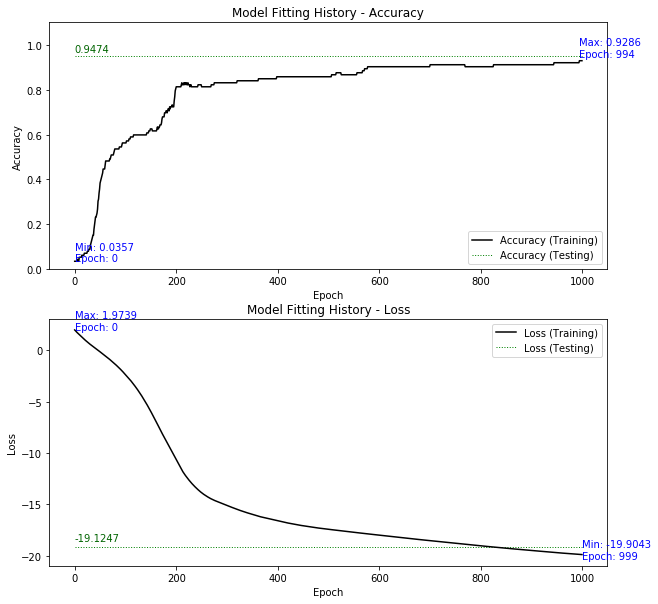

In [15]:
# Plot Epoch history
# fig1 = plt.figure(figsize=(10,10))
fig1 = plt.figure(figsize=(10,10))

# Create a single plot of all results
ax1 = fig1.add_subplot( 2,1,1 )
ax2 = fig1.add_subplot( 2,1,2 )

# X-axis
x_vals = range(len(hist.history['acc']))

# Plots
ax1.set_ylim(ymax=1.1)
ax1.plot( x_vals, hist.history['acc'],
          label='Accuracy (Training)', c='k', linestyle='-')

ax2.plot( x_vals, hist.history['loss'],
          label='Loss (Training)', c='k', linestyle='-')

# Add text note on the max and min accuracy and loss points
acc_min_idx = np.argmin(hist.history['acc'])
ax1.text( x=acc_min_idx, y=hist.history['acc'][acc_min_idx]*1.02, c='b',
          s=f"Min: {hist.history['acc'][acc_min_idx]:.4f}\nEpoch: {acc_min_idx}" )

acc_max_idx = np.argmax(hist.history['acc'])
ax1.text( x=acc_max_idx, y=hist.history['acc'][acc_max_idx]*1.02, c='b',
          s=f"Max: {hist.history['acc'][acc_max_idx]:.4f}\nEpoch: {acc_max_idx}" )

loss_min_idx = np.argmin(hist.history['loss'])
ax2.text( x=loss_min_idx, y=hist.history['loss'][loss_min_idx]*1.02, c='b',
          s=f"Min: {hist.history['loss'][loss_min_idx]:.4f}\nEpoch: {loss_min_idx}" )
         
loss_max_idx = np.argmax(hist.history['loss'])
ax2.text( x=loss_max_idx, y=hist.history['loss'][loss_max_idx]*1.02, c='b',
          s=f"Max: {hist.history['loss'][loss_max_idx]:.4f}\nEpoch: {loss_max_idx}" )

# If populated, plot the loss and accuracy from the test samples
try:
    loss_val = m_score_list[0]
    acc_val = m_score_list[1]

    ax1.text( x=min(x_vals), y=acc_val*1.02, c='darkgreen', s=f"{acc_val:.4f}")
    ax1.hlines(y=acc_val, xmin=min(x_vals), xmax=max(x_vals),
              label='Accuracy (Testing)', color='g', linewidth=1, linestyle=':')    
    
    ax2.text( x=min(x_vals), y=loss_val*0.97, c='darkgreen', s=f"{loss_val:.4f}")
    ax2.hlines(y=loss_val, xmin=min(x_vals), xmax=max(x_vals),
              label='Loss (Testing)', color='g', linewidth=1, linestyle=':')    
except:
    pass
    
ax1.legend(loc='lower right')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Model Fitting History - Accuracy")

ax2.legend(loc='upper right')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_title("Model Fitting History - Loss")

fig1.savefig("docs/9-Figure-Neural_Networks-Model_Fitting_History.png")

In [16]:
# Make some predictions using the testing data
y_encoded_predictions = model.predict_classes(X_test_scaled)
y_encoded_actual = [ np.argmax(y_val) for y_val in y_test ]

# Get the labels from the one-hot encoded predictions and y_test values
# prediction_labels = label_encoder.inverse_transform(encoded_predictions)   # No Label Encoder needed this time
# Use the iris dataset target_names array to get the labels
y_prediction_labels = [ iris.target_names[i] for i in y_encoded_predictions ]
y_actual_labels = [ iris.target_names[i] for i in y_encoded_actual ]

predict_sample_df = pd.DataFrame(
    {'Actual': y_actual_labels,
     'Prediction': y_prediction_labels})
predict_sample_df['Correct'] = (predict_sample_df['Actual'] == predict_sample_df['Prediction'])

predict_sample_df.head()

,Actual,Prediction,Correct
0,setosa,setosa,True
1,virginica,virginica,True
2,virginica,virginica,True
3,virginica,virginica,True
4,versicolor,versicolor,True


In [17]:
m_accuracy = sum(predict_sample_df['Correct']) / len(predict_sample_df['Correct'])
print(f"Model Accuracy: {m_accuracy:.4f}")

Model Accuracy: 0.9474


### Save the Fitted Model

In [18]:
# Save the fitted model
model.save("resources/basic_model.h5")

### Load a Fitted Model

In [19]:
# Reload the fitted model
prev_model = load_model("resources/basic_model.h5")

In [20]:
# Make some predictions using the testing data
s_min = 10
s_max = 20
y_encoded_predictions = prev_model.predict_classes(X_test_scaled[s_min:s_max])
y_encoded_actual = [ np.argmax(y_val) for y_val in y_test[s_min:s_max] ]

# Get the labels from the one-hot encoded predictions and y_test values
# prediction_labels = label_encoder.inverse_transform(encoded_predictions)   # No Label Encoder needed this time
# Use the iris dataset target_names array to get the labels
y_prediction_labels = [ iris.target_names[i] for i in y_encoded_predictions ]
y_actual_labels = [ iris.target_names[i] for i in y_encoded_actual ]

# Create a DataFrame of actual vs. predicted results
predict_prev_model_df = pd.DataFrame(
    {'Actual': y_actual_labels,
     'Prediction': y_prediction_labels})

# Flag the predictions as being correct or not
predict_prev_model_df['Correct'] = (predict_prev_model_df['Actual'] == predict_prev_model_df['Prediction'])
predict_prev_model_df

,Actual,Prediction,Correct
0,setosa,setosa,True
1,setosa,setosa,True
2,setosa,setosa,True
3,versicolor,versicolor,True
4,setosa,setosa,True
5,versicolor,versicolor,True
6,setosa,setosa,True
7,versicolor,versicolor,True
8,versicolor,versicolor,True
9,versicolor,versicolor,True
